<br/>

## Loading libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets



## Getting dataset and Reconnaissance

In [23]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/tt.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.drop(df[['PassengerId','Name','SibSp','Parch','Ticket','Cabin']], axis = 1, inplace = True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [37]:
df2 = pd.get_dummies(df1, columns = ['Sex','Embarked'], drop_first = True)



## Split X and Y

In [38]:
X = pd.DataFrame(df2[['Pclass','Age','Fare','Sex_male','Embarked_Q','Embarked_S']])
y = pd.DataFrame(df2.Survived)



## Splitting into Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)



## Model build up

In [40]:
cf = DecisionTreeClassifier(criterion ='gini', random_state = 1)
model = cf.fit(X_train, y_train)



## Prediction

In [41]:
y_pred = cf.predict(X_test)


## Model Accuracy (R-squared value)

In [42]:
metrics.accuracy_score(y_test, y_pred)

0.7877094972067039

In [43]:
cf.score(X_test, y_test)

0.7877094972067039

<br/>
<br/>

# Confusion Matrix

In [44]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[91, 15],
       [23, 50]], dtype=int64)

<br/>

# Visualize the confusion matrix with Seaborn

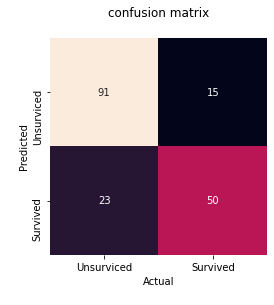

In [56]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = ['Unsurviced','Survived'], yticklabels = ['Unsurviced','Survived'])
plt.xlabel("Actual\n")
plt.ylabel("\nPredicted")
plt.title("confusion matrix\n")
plt.show()

<br/>
<br/>

# Sensitivity and specitivity

In [47]:
Sensitivity = 91/(91+23)
Sensitivity

0.7982456140350878

##### Sensitivity 0.79 means that about 79% of the people who unsurvived can be correctly specified by this model.

In [57]:
specitivity = 50/(50+15)
specitivity

0.7692307692307693

#####  specitivity 0.77 means that about 77% of the people  who survived can be correctly specified by this model.
### This also means that this model is comperatively better for predicting who didn't survive.